# Final Project Report

## Problem statement

I’m very interested in Beijing air pollution problem, so I choose Beijing pm2.5 dataset to analyze.  
I want to know which factors influence pm2.5 concentration and the relationship between them.  
I hope I could find a premium model to do machine learning and prediction.

## Dataset description

I get data from the [Beijing PM2.5 Data Data Set](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data).

Reference paper from Song Xi Chen, csx '@' gsm.pku.edu.cn, Guanghua School of Management, Center for Statistical Science, Peking University.
This dataset show data of Beijing PM2.5 concentration of each hour in each day from 2010 to 2014, which contains 43824 records (365*5*24+24, because 2014 has 366 days) with 13 attributes.

** The attributes are as follows: **

- No: this column is row number of the dataset, which has 43824 different values
- year: the column shows 2010-2014 data, which has 5 different values
- month: the column shows month data with 12 different values
- day: the column shows day data with 31 different values
- hour: the column shows hour data with 24 different values
- pm2.5: the column shows PM2.5 concentration (ug/m^3), which serve as our label column.
- DEWP: Dew Point is the temperature to which air must be cooled to become saturated with water vapor.
  When further cooled, the - airborne water vapor will condense to form liquid water (dew).
  In this dataset, Dew Point range from -40°C to 28°C.
- TEMP: Temperature, which range from -19°C to 42°C.
  Because in Beijing northwest suburban areas, it could be very cold in winter - night;
  in Beijing city center, it could be very hot in midsummer noon.
- PRES: Pressure (hPa), which means force per unit area exerted by an atmospheric column
  (that is, the entire body of air above - the specified area).
  Generally speaking, pressure decreases with increasing altitude.
  It ranges from 991 to 1046 in this column.
- cbwd: Combined wind direction. It contains four values:
  NE-northeast, NW-northwest, SE-southeast, cv-calm and variable.
  Generally speaking, in summer, southeast wind is dominant, in winter, northwest wind is dominant.
- Iws: Cumulated wind speed (m/s), which ranges from 0.45m/s to 85.44m/s
- Is: Cumulated hours of snow, it shows cumulated snow hours,
  which will not be break by day. Sometimes, snow could last several days.
  It ranges from 0 hour to 27 hours here.
- Ir: Cumulated hours of rain, it shows cumulated rain hours, which will also not be break by day.
  Sometimes, rain could last several days. It ranges from 0 hour to 36 hours here.

## Exploratory analysis

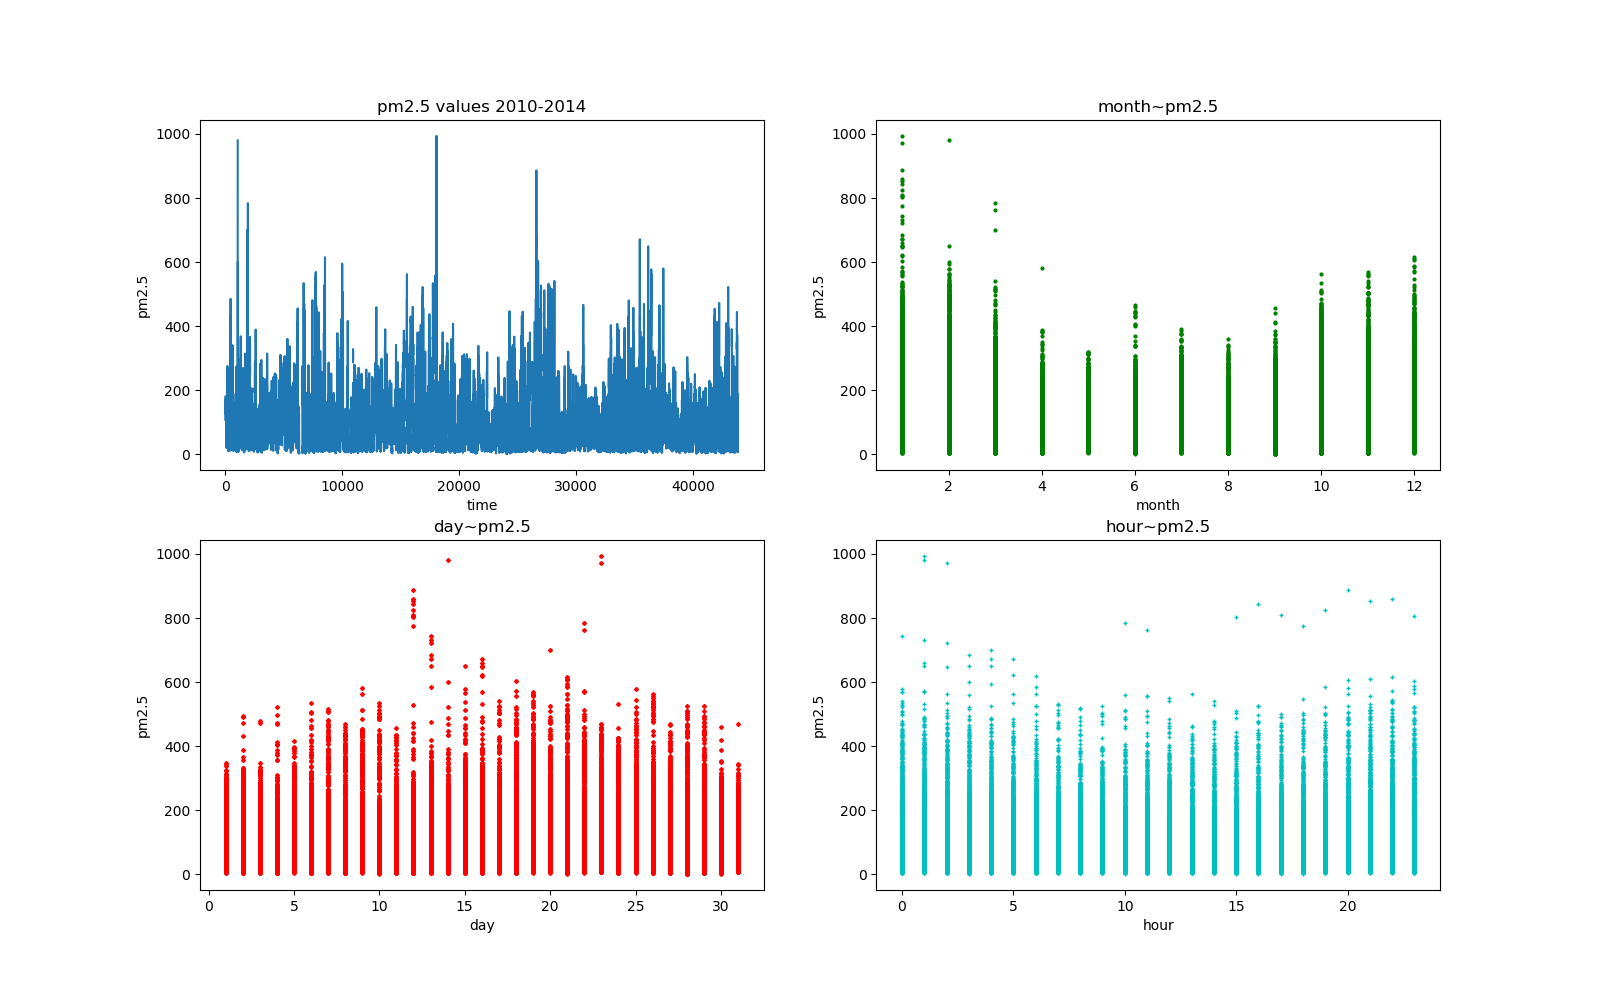

In [5]:
import matplotlib.pyplot as plt

csv_data = pd.read_csv('/dbfs/FileStore/tables/Beijing.csv',
                       index_col=0)

NO=range(1,43825)
fig,axes=plt.subplots(figsize=(16,10))
plt.subplot(221)
plt.plot(NO, csv_data['pm2.5'].values, markersize="1")
plt.ylabel("pm2.5")
plt.xlabel("time")
plt.title("pm2.5 values 2010-2014")
plt.subplot(222)
plt.plot(csv_data["month"].values, csv_data["pm2.5"].values, "go", markersize="2")
plt.xlabel("month")
plt.ylabel("pm2.5")
plt.title("month~pm2.5")
plt.subplot(223)
plt.plot(csv_data["day"].values, csv_data["pm2.5"].values, "rD", markersize="2")
plt.title("day~pm2.5")
plt.xlabel("day")
plt.ylabel("pm2.5")
plt.subplot(224)
plt.plot(csv_data["hour"].values, csv_data["pm2.5"].values, "c+", markersize="3")
plt.xlabel("hour")
plt.ylabel("pm2.5")
plt.title("hour~pm2.5")
display(fig)


From chart1 we could see that pm2.5 changes periodically from 2010 to 2014. It has 5 valleys and 6 peaks from the upper left chart, which means pm2.5 doesn’t significantly change as year goes by. It just changed regularly during a year.
From upper right chart, we could see that pm2.5 reach a peak in winter and touch bottom in summer.
From lower left chart, we could see that pm2.5 value fluctuate frequently during the 31 days. Although we can’t see evident pattern, maybe human activities change within a month, we can’t drop this column now.
From lower right chart, we could see that there is some relationship between hour and pm2.5, because it shows pm2.5 is higher at night.
We could say our dataset is a time series dataset, it show pm2.5 changes for 5 consecutive years.

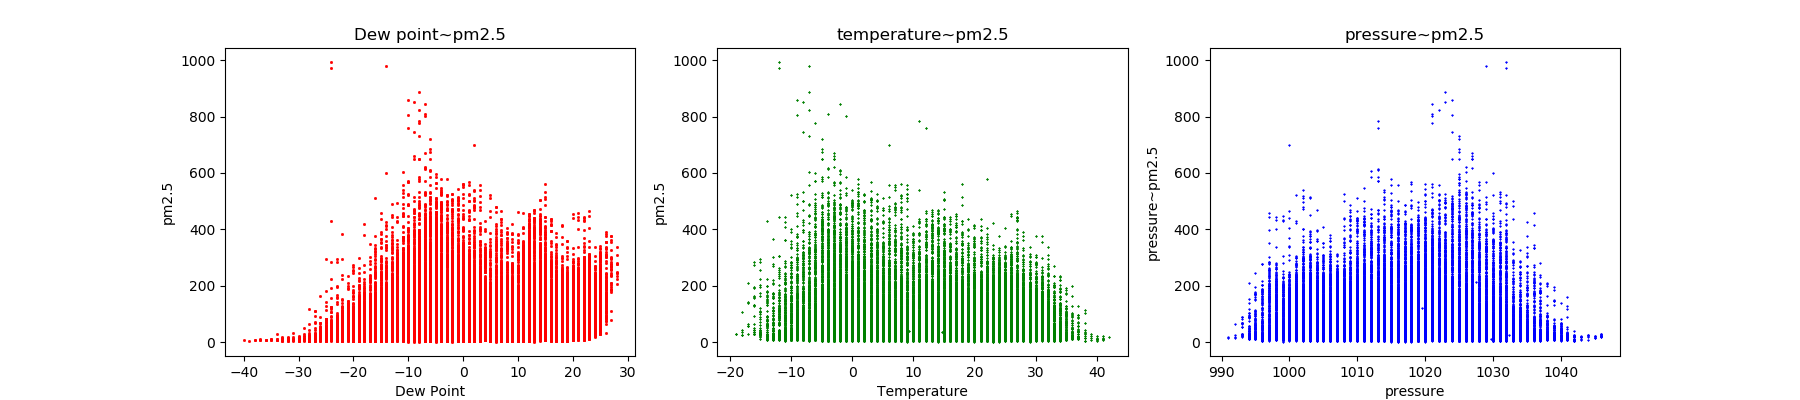

In [7]:
fig,axes=plt.subplots(figsize=(18,4))
plt.subplot(131)
plt.plot(csv_data["DEWP"].values, csv_data["pm2.5"].values, "rs", markersize="1")
plt.xlabel("Dew Point")
plt.ylabel("pm2.5")
plt.title("Dew point~pm2.5")
plt.subplot(132)
plt.plot(csv_data["TEMP"].values, csv_data["pm2.5"].values,"gx", markersize="1")
plt.xlabel("Temperature")
plt.ylabel("pm2.5")
plt.title("temperature~pm2.5")
plt.subplot(133)
plt.plot(csv_data["PRES"].values, csv_data["pm2.5"].values,"b*", markersize="1")
plt.xlabel("pressure")
plt.ylabel("pressure~pm2.5")
plt.title("pressure~pm2.5")
display(fig)

Chart2 show the relationship of pm2.5 with Dew point; temperature and pressure. We see that the relationship is significant of all three features. All three plots show plateau-shaped pattern.

In [9]:
import seaborn as sns
fig,axes=plt.subplots(figsize=(12,4))
plt.subplot(121)
sns.countplot(x=csv_data["cbwd"].values, y=csv_data["pm2.5"].values)
plt.xlabel("combined wind direction")
plt.ylabel("pm2.5")
plt.title("wind direction~pm2.5")
plt.subplot(122)
plt.plot(csv_data["Iws"].values, csv_data["pm2.5"].values, "c*", markersize="2")
plt.xlabel("cumulated wind speed")
plt.ylabel("pm2.5")
plt.title("cummulated wind speed~pm2.5")
display(fig)

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-2842882344881225> in <module> () 
 2 fig , axes = plt . subplots ( figsize = ( 12 , 4 ) ) 
 3 plt . subplot ( 121 ) 
 ----> 4 sns . countplot ( x = csv_data [ "cbwd" ] . values , y = csv_data [ "pm2.5" ] . values ) 
 5 plt . xlabel ( "combined wind direction" ) 
 6 plt . ylabel ( "pm2.5" ) 

 /databricks/python/lib/python3.6/site-packages/seaborn/categorical.py in countplot (x, y, hue, data, order, hue_order, orient, color, palette, saturation, dodge, ax, **kwargs) 
 3350 y = x
 3351 elif x is not None and y is not None : 
 -> 3352 raise TypeError ( "Cannot pass values for both `x` and `y`" ) 
 3353 else : 
 3354 raise TypeError ( "Must pass values for either `x` or `y`" ) 

 TypeError : Cannot pass values for both `x` and `y`

From chart3, we could see relationship between wind direction and pm2.5. pm2.5 show different value ranges for different wind direction, so this feature is significant.
From upper right chart, we see that as cumulated wind speed increase, pm2.5 decrease.

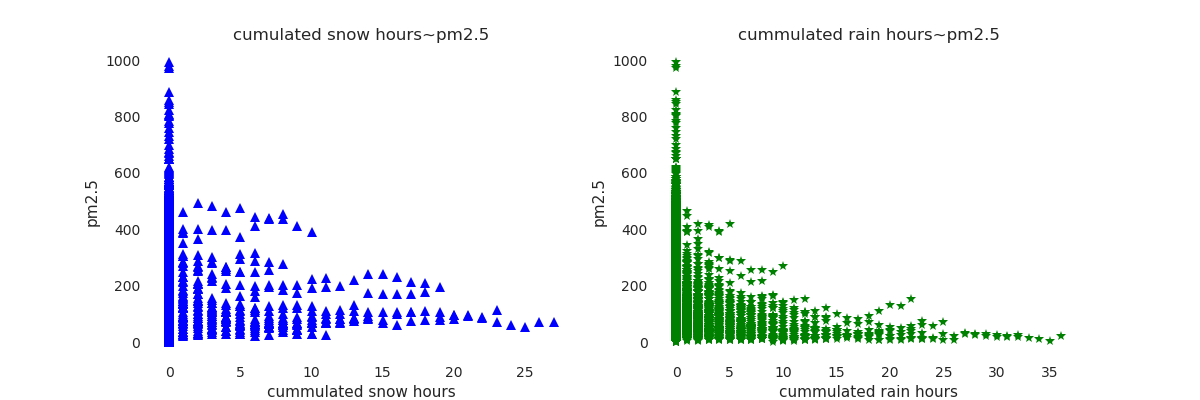

In [11]:
fig,axes=plt.subplots(figsize=(12,4))
plt.subplot(121)
plt.plot(csv_data["Is"].values, csv_data["pm2.5"].values, "b^")
plt.xlabel("cummulated snow hours")
plt.ylabel("pm2.5")
plt.title("cumulated snow hours~pm2.5")
plt.subplot(122)
plt.plot(csv_data["Ir"].values, csv_data["pm2.5"].values, "g*")
plt.xlabel("cummulated rain hours")
plt.ylabel("pm2.5")
plt.title("cummulated rain hours~pm2.5")
display(fig)

From chart4 we could see that pm2.5 decrease with more cumulated snow hours and cumulated rain hours.

In [13]:
num_bins=20
n=43824
n,bins,patches=plt.hist(csv_data["pm2.5"].values, num_bins=20)
plt.show()

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-2842882344881229> in <module> () 
 1 num_bins = 20 
 2 n = 43824 
 ----> 3 n , bins , patches = plt . hist ( csv_data [ "pm2.5" ] . values , num_bins = 20 ) 
 4 plt . show ( ) 

 /databricks/python/lib/python3.6/site-packages/matplotlib/pyplot.py in hist (x, bins, range, density, weights, cumulative, bottom, histtype, align, orientation, rwidth, log, color, label, stacked, normed, hold, data, **kwargs) 
 3130 histtype = histtype , align = align , orientation = orientation , 
 3131 rwidth = rwidth , log = log , color = color , label = label , 
 -> 3132 stacked=stacked, normed=normed, data=data, **kwargs)
 3133 finally : 
 3134 ax . _hold = washold

 /databricks/python/lib/python3.6/site-packages/matplotlib/__init__.py in inner (ax, *args, **kwargs) 
 1853 "the Matplotlib list!)" % ( label_namer , func . __name__ ) , 
 1854 RuntimeWarning, stacklevel=2)
 -> 1855 return func ( ax , * args , ** kwargs ) 
 1856 
 1857 inner.__doc__ = _add_data_doc(inner.__doc__,

 /databricks/python/lib/python3.6/site-packages/matplotlib/axes/_axes.py in hist (***failed resolving arguments***) 
 6528 # this will automatically overwrite bins, 
 6529 # so that each histogram uses the same bins 
 -> 6530 m , bins = np . histogram ( x [ i ] , bins , weights = w [ i ] , ** hist_kwargs ) 
 6531 m = m . astype ( float ) # causes problems later if it's an int 
 6532 if mlast is None : 

 /databricks/python/lib/python3.6/site-packages/numpy/lib/function_base.py in histogram (a, bins, range, normed, weights, density) 
 665 if first_edge > last_edge : 
 666 raise ValueError(
 --> 667 'max must be larger than min in range parameter.')
 668 if not np . all ( np . isfinite ( [ first_edge , last_edge ] ) ) : 
 669 raise ValueError(

 ValueError : max must be larger than min in range parameter.

Chart5 show pm2.5 value distribution. It is below 200 for most time.

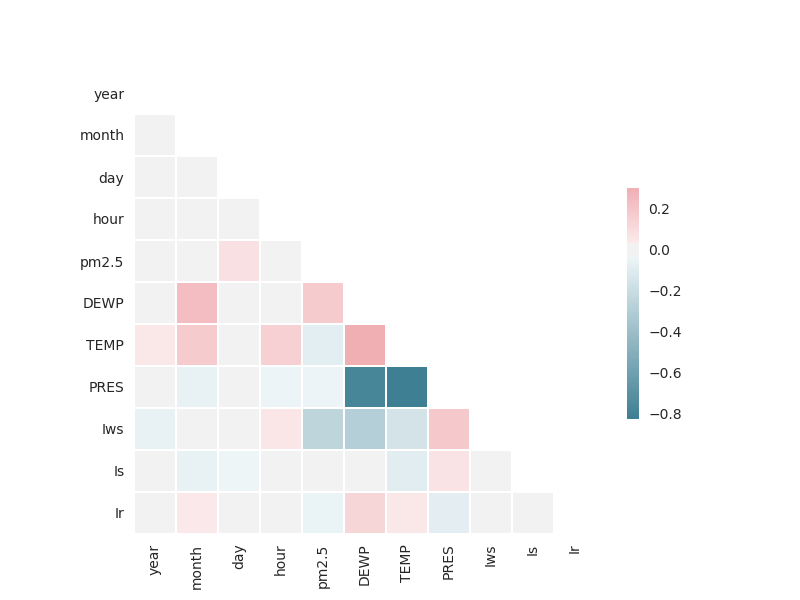

In [15]:
import seaborn as sns
import numpy as np

sns.set(style="white")

result=csv_data.drop("cbwd", axis=1)
result
corr=result.corr()

mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

fig,ax=plt.subplots(figsize=(8,6))

cmap=sns.diverging_palette(220,10,as_cmap=True)

chart=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidth=0.5, cbar_kws={"shrink":0.5})
display(fig)


Chart6 shows correlation heatmap of all features and label. It excludes feature cbwd (combined wind direction), because the values of cbwd are categories. We see that pm2.5 has strong relationship with Dew point and cumulated wind speed.

## Data cleaning
For missing values: pm2.5 column has some N/A values which accounts for 4.73% of whole column values, so we need set 0 for these values.

Because Beijing.csv of pm2.5 is a timeseries data so first we need merge all time related columns into one column represent the date time.  
In this data sets we merge 'year', 'month', 'day', 'hour' into column year_month_day_hour column to represent the date for this time series.  
‘No’ column is unnecessary for our machine learning, so we just drop this column.

I define time_series_pre_process function to convert raw csv data to pre process datasets.

In [18]:
def time_series_pre_process(csv):
    """
    raw data pre process
    merge time series column into one column
    set NA to 0 in pm2.5 column
    remove No column which is unnecessary
    """
    csv_data = pd.read_csv(csv,
                           parse_dates=[['year', 'month', 'day', 'hour']],
                           index_col=0)

    print("csv_data after merge date time columns: \n{}".format(csv_data.head(5)))

    csv_data['pm2.5'].fillna(0, inplace=True)
    csv_data.drop('No', axis=1, inplace=True)

    print("csv_data after fill N/A and drop No column: \n{}".format(csv_data.head(5)))

    return csv_data

pm25_time_series = time_series_pre_process('/dbfs/FileStore/tables/Beijing.csv')

csv_data after merge date time columns: 
 No pm2.5 DEWP TEMP PRES cbwd Iws Is Ir
year_month_day_hour 
2010 1 1 0 1 NaN -21 -11.0 1021.0 NW 1.79 0 0
2010 1 1 1 2 NaN -21 -12.0 1020.0 NW 4.92 0 0
2010 1 1 2 3 NaN -21 -11.0 1019.0 NW 6.71 0 0
2010 1 1 3 4 NaN -21 -14.0 1019.0 NW 9.84 0 0
2010 1 1 4 5 NaN -20 -12.0 1018.0 NW 12.97 0 0
csv_data after fill N/A and drop No column: 
 pm2.5 DEWP TEMP PRES cbwd Iws Is Ir
year_month_day_hour 
2010 1 1 0 0.0 -21 -11.0 1021.0 NW 1.79 0 0
2010 1 1 1 0.0 -21 -12.0 1020.0 NW 4.92 0 0
2010 1 1 2 0.0 -21 -11.0 1019.0 NW 6.71 0 0
2010 1 1 3 0.0 -21 -14.0 1019.0 NW 9.84 0 0
2010 1 1 4 0.0 -20 -12.0 1018.0 NW 12.97 0 0

Quick view of timeseries data I plot each column trend vs date time change except the wind direction which is category data.

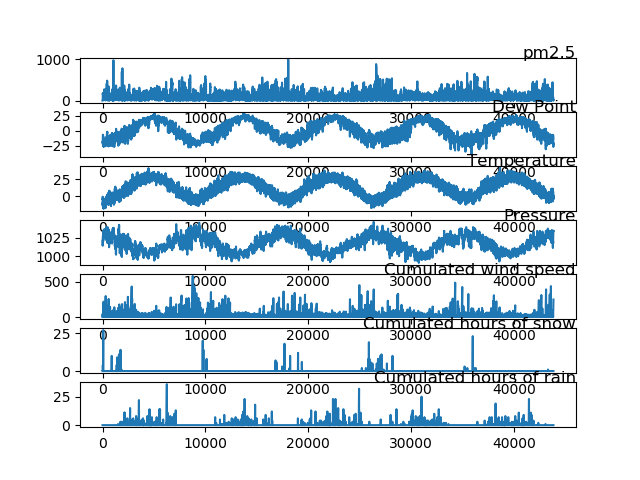

In [20]:
def time_series_quick_view(time_series):
    """
    create a time series quick view of each series
    """
    plot_index = 1
    cols = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']
    col_titles = ['pm2.5', 'Dew Point', 'Temperature',
                  'Pressure', 'Cumulated wind speed', 'Cumulated hours of snow', 'Cumulated hours of rain']

    fig, ax = plt.subplots()

    for col in cols:
        plt.subplot(len(cols), 1, plot_index)
        plt.plot(time_series[col].values)
        plt.title(col_titles[plot_index-1], y=0.8, loc='right')
        plot_index += 1

    display(fig)

time_series_quick_view(pm25_time_series)

## Feature engineering
1. Dummy variables
We see there is a feature called cbwd, which has 4 different categories, we should create 3 dummy variables for the column. But we use time series model here, we could use another method (Label Encoder) to set values for this column. Values are 0,1,2,3 for different wind directions.

1. Feature normalization
We have to do feature scaling for all features so as they all have range [0,1]. This is demanded by our machine learning model-LSTM networks (Long Short-Term Memory (LSTM) recurrent neural networks).

1. Cross-validation
I choose 5-fold cross-validation method to do cross-validation. Because values of our label column-pm2.5 are numeric, so I want to use root mean square error indicator to evaluate models.

### Label Encode & Normalize
The wind speed direction column is string label I choose LabelEncoder(Encode labels with value between 0 and n_classes-1) to encode it to integer and use MinMaxScaler(Transforms features by scaling each feature to a given range.) to normalize to [0, 1].

In [23]:
def col_label_encode_and_normalize(csv_data, encode_col_index):
    """
    The wind speed feature is string
    we need use LabelEncoder to encode it to integer
    use MinMaxScaler to normalize to [0, 1]
    """
    encoded_data = csv_data.values
    encoder = LabelEncoder()

    print("before label encoder:\n{}".format(
        encoded_data[:, encode_col_index]))
    encoded_data[:, encode_col_index] = encoder.fit_transform(
        encoded_data[:, encode_col_index])
    print("after label encoder:\n{}".format(encoded_data[:, encode_col_index]))

    print("before normalize:\n{}".format(encoded_data))
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(encoded_data)
    print("after nromalize:\n{}".format(scaled_data))

    return scaler, scaled_data
  
scaler, encode_normalize_data = col_label_encode_and_normalize(pm25_time_series, 4)

before label encoder:
['NW' 'NW' 'NW' ... 'NW' 'NW' 'NW']
after label encoder:
[1 1 1 ... 1 1 1]
before normalize:
[[0.0 -21 -11.0 ... 1.79 0 0]
 [0.0 -21 -12.0 ... 4.92 0 0]
 [0.0 -21 -11.0 ... 6.71 0 0]
 ...
 [10.0 -22 -3.0 ... 242.7 0 0]
 [8.0 -22 -4.0 ... 246.72 0 0]
 [12.0 -21 -3.0 ... 249.85 0 0]]
/databricks/python/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
 warnings.warn(msg, DataConversionWarning)
after nromalize:
[[0. 0.27941176 0.13114754 ... 0.00229001 0. 0. ]
 [0. 0.27941176 0.1147541 ... 0.00763907 0. 0. ]
 [0. 0.27941176 0.13114754 ... 0.01069811 0. 0. ]
 ...
 [0.01006036 0.26470588 0.26229508 ... 0.41399641 0. 0. ]
 [0.00804829 0.26470588 0.24590164 ... 0.42086644 0. 0. ]
 [0.01207243 0.27941176 0.26229508 ... 0.4262155 0. 0. ]]

### To Supervised Learning Problem
Time series forecasting can be framed as a supervised learning problem. We can do this by using previous time steps as input variables and use the next time step as the output variable. This method is called the sliding window method.  
From teacher recommended article “How to Convert a Time Series to a Supervised Learning Problem in Python” (https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/) I use the function series_to_supervised.

In [25]:

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    time series forecasting problems must be re-framed as supervised learning problems
    this function is from below article:
    https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    print("supervised datasets:\n{}".format(agg.head()))

    return agg

  
supervised_data = series_to_supervised(encode_normalize_data, 1, 1)

supervised datasets:
 var1(t-1) var2(t-1) var3(t-1) ... var6(t) var7(t) var8(t)
1 0.0 0.279412 0.131148 ... 0.007639 0.0 0.0
2 0.0 0.279412 0.114754 ... 0.010698 0.0 0.0
3 0.0 0.279412 0.131148 ... 0.016047 0.0 0.0
4 0.0 0.279412 0.081967 ... 0.021396 0.0 0.0
5 0.0 0.294118 0.114754 ... 0.026745 0.0 0.0

[5 rows x 16 columns]

After run this function on the timeseries data I get the below supervised datasets where we can see that var1(t-1) to var8(t).  
Drop columns we don't want to predict.

In [27]:
def cleanup_supervised_data(supervised_data):
    """
    drop columns we don't want to predict
    only keep pm2.5(t)
    """
    supervised_data.drop(
        supervised_data.columns[[9, 10, 11, 12, 13, 14, 15]], axis=1, inplace=True)

    print("supervised datasets after cleanup unused column\n{}".format(
        supervised_data.head()))
    
cleanup_supervised_data(supervised_data)

supervised datasets after cleanup unused column
 var1(t-1) var2(t-1) var3(t-1) ... var7(t-1) var8(t-1) var1(t)
1 0.0 0.279412 0.131148 ... 0.0 0.0 0.0
2 0.0 0.279412 0.114754 ... 0.0 0.0 0.0
3 0.0 0.279412 0.131148 ... 0.0 0.0 0.0
4 0.0 0.279412 0.081967 ... 0.0 0.0 0.0
5 0.0 0.294118 0.114754 ... 0.0 0.0 0.0

[5 rows x 9 columns]

## Methodology

### Train & Test Split
Before apply any machine learning algorithms into our datasets we need split them into train and test sets. In our case data is in 1 hour each pattern so we can define the threshold by hour between 5 years.

In [29]:
def split_train_test_datas(datasets, threshold):
    """
    split datasets into train and test sub datasets
    threshold is the train hours
    """
    train = datasets.values[:threshold, :]
    test = datasets.values[threshold:, :]
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

    return train_X, train_y, test_X, test_y

  
train_X, train_y, test_X, test_y = split_train_test_datas(supervised_data, 365*24)

### Machine Learning
After research I find that classical linear methods is really difficult to adapt to multivariate or multiple input forecasting problems so we can not apply linear model to time series problems.  
LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series.  
Python library Keras is well support the LSTM algorithms and is great benefit in time series forecasting.

In [31]:
def machine_learning(train_X, train_y, test_X, test_y):
    """
    fit an LSTM on the multivariate input data
    """
    neurons = 32
    data_dim = train_X.shape[2]
    timesteps = train_X.shape[1]
    batch_size = 64
    epochs = 50

    print("data_dim:{0}, timesteps:{1}\n".format(data_dim, timesteps))

    model = Sequential()
    # we stack 3 LSTM layers on top of each other,
    # making the model capable of learning higher-level temporal representations
    model.add(LSTM(neurons, return_sequences=True,
                   input_shape=(timesteps, data_dim)))
    model.add(LSTM(neurons, return_sequences=True))
    model.add(LSTM(neurons))

    model.add(Dense(1))
    # we need to configure the learning process
    # which is done via the compile method
    model.compile(optimizer='adam', loss='mae')
    # Keras models are trained on Numpy arrays of input data and labels
    # For training a model, you will typically use the  fit function
    # fit method trains the model for a given number of epochs(iterations on a dataset).
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size,
                        validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # Its History.history attribute is a record of training
    # loss values and metrics values at successive epochs
    return model, history

model, result = machine_learning(train_X, train_y, test_X, test_y)

data_dim:8, timesteps:1

Train on 8760 samples, validate on 35063 samples
Epoch 1/50
 - 8s - loss: 0.0661 - val_loss: 0.0609
Epoch 2/50
 - 3s - loss: 0.0530 - val_loss: 0.0626
Epoch 3/50
 - 3s - loss: 0.0276 - val_loss: 0.0507
Epoch 4/50
 - 3s - loss: 0.0190 - val_loss: 0.0410
Epoch 5/50
 - 3s - loss: 0.0178 - val_loss: 0.0340
Epoch 6/50
 - 3s - loss: 0.0170 - val_loss: 0.0279
Epoch 7/50
 - 3s - loss: 0.0165 - val_loss: 0.0236
Epoch 8/50
 - 3s - loss: 0.0159 - val_loss: 0.0215
Epoch 9/50
 - 3s - loss: 0.0155 - val_loss: 0.0206
Epoch 10/50
 - 3s - loss: 0.0152 - val_loss: 0.0191
Epoch 11/50
 - 3s - loss: 0.0150 - val_loss: 0.0187
Epoch 12/50
 - 3s - loss: 0.0149 - val_loss: 0.0168
Epoch 13/50
 - 3s - loss: 0.0148 - val_loss: 0.0171
Epoch 14/50
 - 3s - loss: 0.0149 - val_loss: 0.0167
Epoch 15/50
 - 3s - loss: 0.0149 - val_loss: 0.0161
Epoch 16/50
 - 3s - loss: 0.0149 - val_loss: 0.0160
Epoch 17/50
 - 3s - loss: 0.0149 - val_loss: 0.0161
Epoch 18/50
 - 3s - loss: 0.0150 - val_loss: 0.0157
Epoch 19/50
 - 3s - loss: 0.0148 - val_loss: 0.0156
Epoch 20/50
 - 3s - loss: 0.0149 - val_loss: 0.0154
Epoch 21/50
 - 4s - loss: 0.0149 - val_loss: 0.0151
Epoch 22/50
 - 3s - loss: 0.0147 - val_loss: 0.0150
Epoch 23/50
 - 3s - loss: 0.0148 - val_loss: 0.0149
Epoch 24/50
 - 6s - loss: 0.0148 - val_loss: 0.0154
Epoch 25/50
 - 4s - loss: 0.0148 - val_loss: 0.0156
Epoch 26/50
 - 8s - loss: 0.0148 - val_loss: 0.0151
Epoch 27/50
 - 6s - loss: 0.0148 - val_loss: 0.0154
Epoch 28/50
 - 5s - loss: 0.0149 - val_loss: 0.0151
Epoch 29/50
 - 4s - loss: 0.0148 - val_loss: 0.0152
Epoch 30/50
 - 4s - loss: 0.0147 - val_loss: 0.0155
Epoch 31/50
 - 3s - loss: 0.0148 - val_loss: 0.0153
Epoch 32/50
 - 3s - loss: 0.0148 - val_loss: 0.0151
Epoch 33/50
 - 3s - loss: 0.0149 - val_loss: 0.0145
Epoch 34/50
 - 4s - loss: 0.0148 - val_loss: 0.0150
Epoch 35/50
 - 5s - loss: 0.0148 - val_loss: 0.0146
Epoch 36/50
 - 3s - loss: 0.0147 - val_loss: 0.0150
Epoch 37/50
 - 3s - loss: 0.0147 - val_loss: 0.0150
Epoch 38/50
 - 3s - loss: 0.0148 - val_loss: 0.0146
Epoch 39/50
 - 3s - loss: 0.0147 - val_loss: 0.0146
Epoch 40/50
 - 3s - loss: 0.0147 - val_loss: 0.0146
Epoch 41/50
 - 3s - loss: 0.0147 - val_loss: 0.0148
Epoch 42/50
 - 3s - loss: 0.0147 - val_loss: 0.0149
Epoch 43/50
 - 3s - loss: 0.0147 - val_loss: 0.0148
Epoch 44/50
 - 3s - loss: 0.0147 - val_loss: 0.0145
Epoch 45/50
 - 3s - loss: 0.0147 - val_loss: 0.0142
Epoch 46/50
 - 3s - loss: 0.0147 - val_loss: 0.0144
Epoch 47/50
 - 3s - loss: 0.0147 - val_loss: 0.0145
Epoch 48/50
 - 3s - loss: 0.0147 - val_loss: 0.0146
Epoch 49/50
 - 3s - loss: 0.0147 - val_loss: 0.0145
Epoch 50/50
 - 3s - loss: 0.0147 - val_loss: 0.0144

### Validation
Firstly, I plot history result from the machine learning function. The history is return from the Sequential fit method which history attribute is a record of training loss values and metrics values at successive epochs.

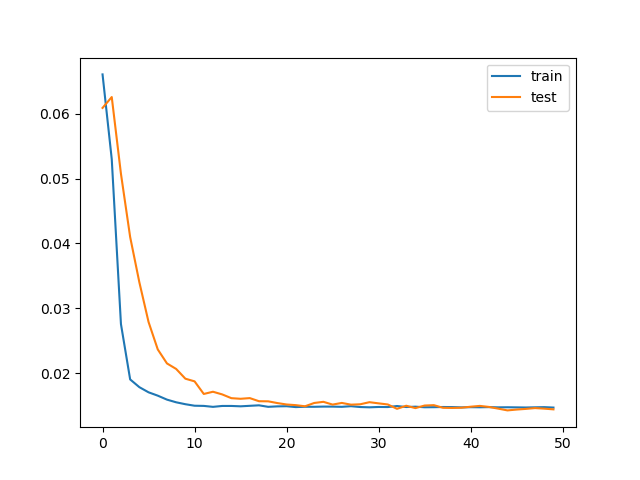

In [33]:
def history_plot(result):
    """
    Plot training lost values vs metrics values
    If they close enough the epochs is big enough
    """
    fig, ax = plt.subplots()

    plt.plot(result.history['loss'], label='train')
    plt.plot(result.history['val_loss'], label='test')
    plt.legend()

    display(fig)

history_plot(result)

Secondly, we calculate the Root Mean Squared Error (RMSE) that gives error in the same units as the variable itself.

In [35]:
def evaluate_model(model, scaler, test_X, test_y):
    """
    we calculate the Root Mean Squared Error (RMSE)
    that gives error in the same units as the variable itself.
    """
    # make a prediction
    y_pred = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast (y predict)
    y_pred = concatenate((y_pred, test_X[:, 1:]), axis=1)
    y_pred = scaler.inverse_transform(y_pred)
    y_pred = y_pred[:, 0]
    # invert scaling for actual (y true)
    test_y = test_y.reshape((len(test_y), 1))
    y_true = concatenate((test_y, test_X[:, 1:]), axis=1)
    y_true = scaler.inverse_transform(y_true)
    y_true = y_true[:, 0]
    # calculate RMSE
    print("y_true:{0}\ny_pred:{1}\n".format(y_true, y_pred))
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    print('Test RMSE: %f' % rmse)
    return rmse

evaluate_model(model, scaler, test_X, test_y)

y_true:[ 0. 0. 0. ... 10. 8. 12.]
y_pred:[ 2.06146107 2.26399145 2.46632371 ... 10.03916632 10.01634604
 8.43305931]

Test RMSE: 27.701466
Out[133]: 27.701465707245653

## Conclusions
After try Logical Regression and GAM(Generalized Additive Models) algorithms I find that the pm2.5 machine learning problem is not only a multiple input variable problem. After get response from teacher’s suggestion and do more research on time series machine learning topics I make sure the problem is time series forecasting problem which should be fit a multivariable time series forecasting machine learning model.  
The challenges of the time series problem are how to change it to supervised learning problem. After that the time series problem can be applied on standard linear or nonlinear machine learning algorithms. The sliding window method can be used to reframing a time series dataset.